# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
data = pd.read_csv('Flipkart_Mobiles.csv')
data.head(5)

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4.0,64.0,4.5,11990,15990
1,OPPO,A53,Mint Cream,4.0,64.0,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6.0,128.0,4.3,13990,17990
3,OPPO,A53,Mint Cream,6.0,128.0,4.3,13990,17990
4,OPPO,A53,Electric Black,4.0,64.0,4.5,11990,15990


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   float64
 4   Storage         3075 non-null   float64
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 194.8+ KB


# 1-Handling missing data

In [4]:
# get the number of missing data points per column
missing_values_count = data.isnull().sum()

# look at the # of missing points 
missing_values_count

Brand               0
Model               0
Color               0
Memory             43
Storage            39
Rating            144
Selling Price       0
Original Price      0
dtype: int64

In [5]:
# replace all the null value in numerical columns with the average and for categorcial columns with mode
data_clean = data.copy()
data_clean.Memory = data.Memory.fillna(data.Memory.mode()[0])
data_clean.Storage = data.Storage.fillna(data.Storage.mode()[0])
data_clean.Rating  = data.Rating.fillna(data.Rating.mean())
data_clean.head()

,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4.0,64.0,4.5,11990,15990
1,OPPO,A53,Mint Cream,4.0,64.0,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6.0,128.0,4.3,13990,17990
3,OPPO,A53,Mint Cream,6.0,128.0,4.3,13990,17990
4,OPPO,A53,Electric Black,4.0,64.0,4.5,11990,15990


In [6]:
data_clean.isnull().sum()

Brand             0
Model             0
Color             0
Memory            0
Storage           0
Rating            0
Selling Price     0
Original Price    0
dtype: int64

# 2-Encoding Categorical Data

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
y = data_clean.iloc[:, 6].values
data_clean.drop("Selling Price",axis=1,inplace = True)
X = data_clean.iloc[:, 1:].values
X.shape

(3114, 6)

In [8]:
X[0]

array(['A53', 'Moonlight Black', 4.0, 64.0, 4.5, 15990], dtype=object)

In [9]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1])], remainder='passthrough')
X =ct.fit_transform(X).toarray()

In [10]:
print(X.shape)
print(y.shape)

(3114, 1556)
(3114,)


# 3-Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scalled = scaler.transform(X)

# 4-Splitting the dataset into training and test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scalled, y, test_size=0.2, random_state=0)

# 5-Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fit the model using lr.fit()
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
import sklearn.metrics as sm
Y_pred = model.predict(X_train)
print("Mean absolute error train =", round(sm.mean_absolute_error(Y_train, Y_pred), 2)) 
print("Mean squared error train=", round(sm.mean_squared_error(Y_train, Y_pred), 2)) 
print("Median absolute error train=", round(sm.median_absolute_error(Y_train, Y_pred), 2)) 
print("Explain variance score train=", round(sm.explained_variance_score(Y_train, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_train, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error train = 431.76
Mean squared error train= 2330025.43
Median absolute error train= 25.8
Explain variance score train= 1.0
R2 score train= 1.0


In [16]:
Y_pred = model.predict(X_test)
print("Mean absolute error test =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error test=", round(sm.mean_squared_error(Y_test, Y_pred), 2)) 
print("Median absolute error test=", round(sm.median_absolute_error(Y_test, Y_pred), 2)) 
print("Explain variance score test=", round(sm.explained_variance_score(Y_test, Y_pred), 2)) 
print("R2 score train=", round(sm.r2_score(Y_test, Y_pred), 2))
#An R2 score near 1 means that the model is able to predict the data very well. Keeping track of every single metric can get tedious, so we pick one or two metrics to evaluate our model. A good practice is to make sure that the mean squared error is low and the explained variance score is high.

Mean absolute error test = 971.59
Mean squared error test= 7278711.99
Median absolute error test= 200.0
Explain variance score test= 0.99
R2 score train= 0.99


## Visualising the Random Forest results

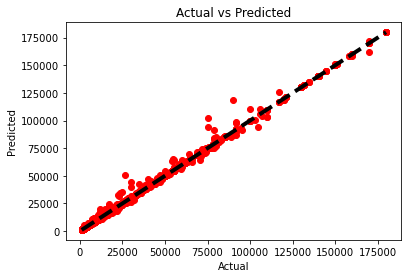

In [17]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = model.predict(X_train)
plt.scatter(Y_train, Y_pred, color='red')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

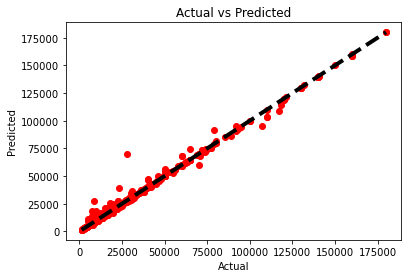

In [18]:
# Plotting actual vs predicted values
# Predict the target values
Y_pred = model.predict(X_test)
plt.scatter(Y_test, Y_pred, color='red')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()